In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio
from fitsio import FITS,FITSHDR
from astropy import units as u
from astropy.coordinates import SkyCoord
from scipy import stats
from astropy.table import Table, Column
from astropy.io import ascii
from scipy.interpolate import griddata
from sklearn import neighbors
import matplotlib.lines as mlines
from scipy.stats import kde
import matplotlib.colors as clr

In [2]:
data = '/Users/amyel/research/SMASH_project/datafiles/SMASH_SDSS_LAMOST_crossmatch.fits'
fx = fitsio.FITS(data)
objs = fx[1].read()

In [3]:
#deredden calibration sample
u_cal = (objs["U"]-(4.239*objs["EBV"]))
g_cal = (objs["G"]-(3.303*objs["EBV"]))
i_cal = (objs["I"]-(1.263*objs["EBV"]))
r_cal = (objs["R"]-(2.285*objs["EBV"]))
feh_cal = objs["FEH"]
u_g_cal = u_cal - g_cal
g_r_cal = g_cal - r_cal

In [4]:
selected = np.where((u_cal<=30)&(r_cal<=30)&(g_cal<=30))
u_std,g_std,r_std = u_cal[selected],g_cal[selected],r_cal[selected]
u_g_std = u_std - g_std
g_r_std = g_std - r_std

In [5]:
xx_std, yy_std = np.mgrid[u_g_std.min():u_g_std.max():1000j, g_r_std.min():g_r_std.max():1000j]
positions = np.vstack([xx_std.ravel(), yy_std.ravel()])
values = np.vstack([u_g_std, g_r_std])
k_std = kde.gaussian_kde(values)

In [6]:
zz_std = np.reshape(k_std(positions).T, xx_std.shape)

In [14]:
def plot(filename):
    #read fits file
    fx = fitsio.FITS(filename)
    objs = fx[1].read()

    u = (objs["U"]-(4.239*objs["EBV"]))
    g = (objs["G"]-(3.303*objs["EBV"]))
    i = (objs["I"]-(1.263*objs["EBV"]))
    r = (objs["R"]-(2.285*objs["EBV"]))
    
    #make cuts
    selected = np.where(((g-i)>=0.11)&((g-i)<=0.44)&(g>=21.9)&(g<=22.8)&(u<=30)&(r<=30)&(objs['CHI']<3)&(abs(objs['SHARP'])<1)&(objs['PROB']>.8))
    u = u[selected]
    g = g[selected]
    i = i[selected]
    r = r[selected]
    u_g = u-g
    g_r = g-r
    uerr = objs['UERR'][selected]
    gerr = objs['GERR'][selected]
    rerr = objs['RERR'][selected]
    
    fig, ax = plt.subplots(figsize=(15,10))
    hess = stats.binned_statistic_2d(u_g, g_r, None, 'count',bins=1000)
    #grey = mlines.Line2D([], [], color='grey', marker='o',linestyle='None',markersize=30, label='Density of Field Stars')
    #spring = mlines.Line2D([], [], color='hotpink', marker='o',linestyle='None',markersize=30, label='Density of Calibration Sample')
    im = ax.pcolormesh(hess.x_edge,hess.y_edge,hess.statistic.T,cmap='gray',norm=clr.LogNorm(),label='Density of Field Stars')
    ax.contour(xx_std,yy_std,zz_std,cmap='spring',label='Density of Calibration Sample')
    #cb = fig.colorbar(im,ax=ax,label='Density of Stars')
    cb = fig.colorbar(im,ax=ax)
    ax.set_xlabel('$(u-g)_0$',fontsize=40)
    ax.set_ylabel('$(g-r)_0$',fontsize=40)
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.set_xlim(-.5,2.7)
    ax.set_ylim(-.5,1.6)
    #plt.legend(fontsize=20)
    ticklabs = cb.ax.get_yticklabels()
    cb.ax.set_yticklabels(ticklabs, fontsize=25)
    plt.show(block=False)

    return 0

In [15]:
fields= [1,   2,   3,   4,   5,   7,   8,   9,  12,  13,  14,  15,  16,
        18,  19,  20,  21,  22,  24,  26,  27,  28,  29,  31,  32,  33,
        34,  37,  40,  44,  46,  49,  51,  52,  53,  54,  55,  56,  57,
        58,  59,  60,  61,  63,  64,  66,  68, 149, 150, 156, 176, 177,
       178]

# Below, the gray scale represents the MSTO stars in the SMASH fields I study. The pink/yellow contours represent the density of the calibration sample from which I caluculate metallicity

/Users/amyel/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]
/Users/amyel/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'label'
  s)


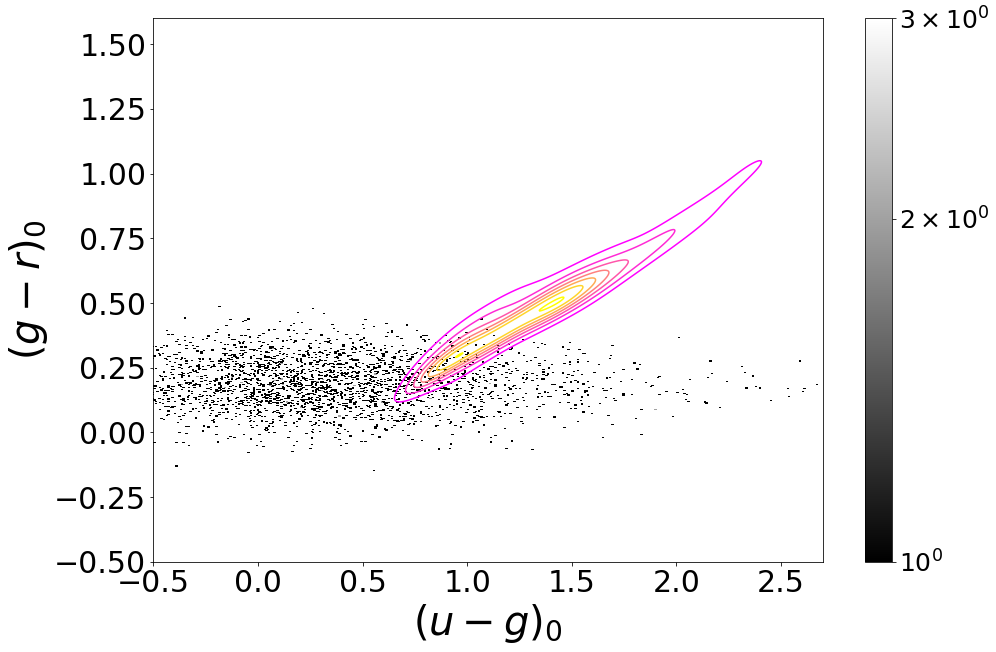

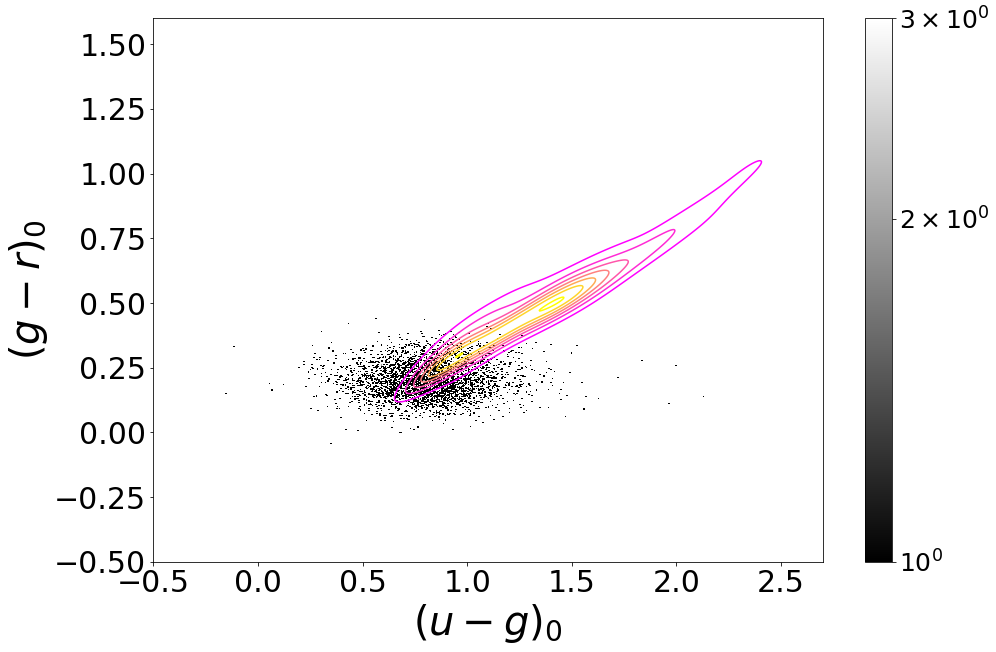

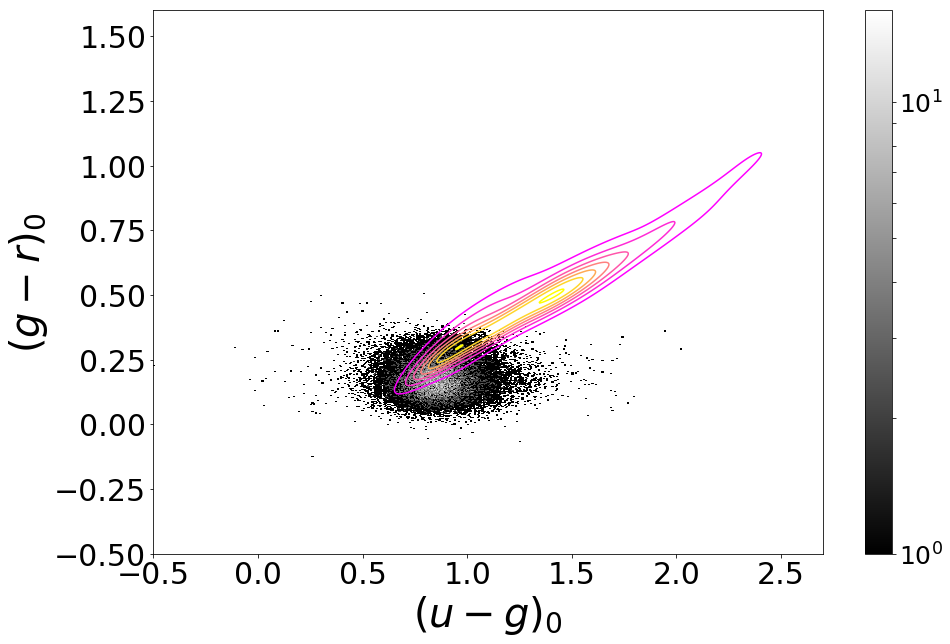

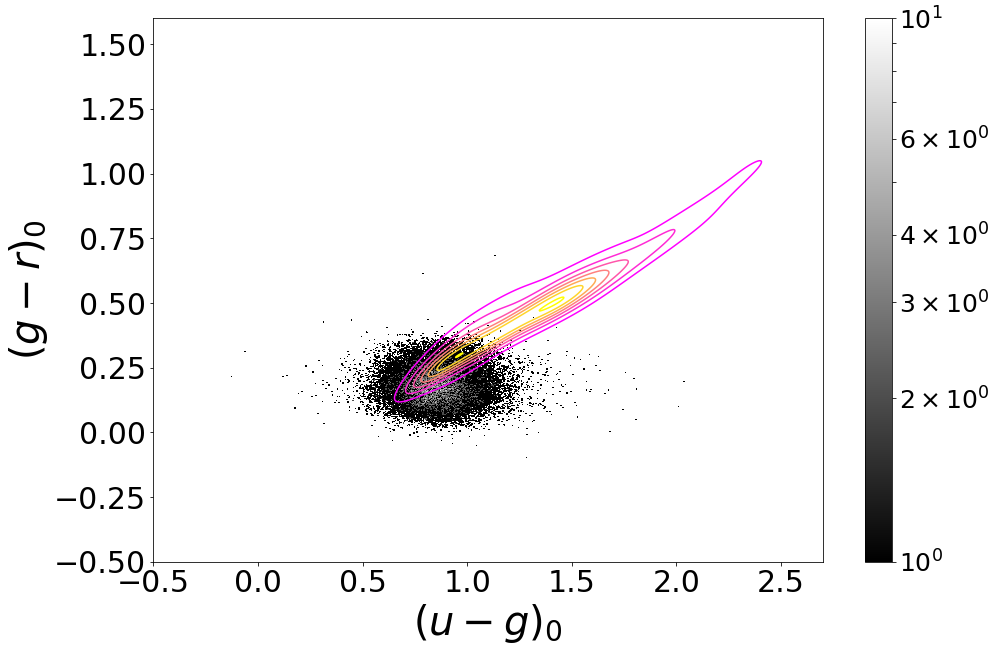

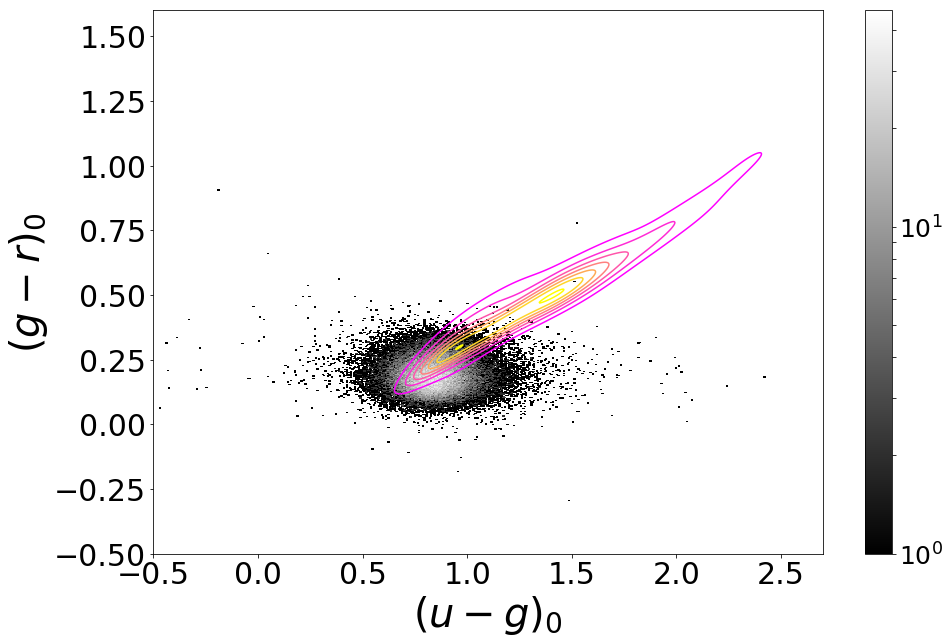

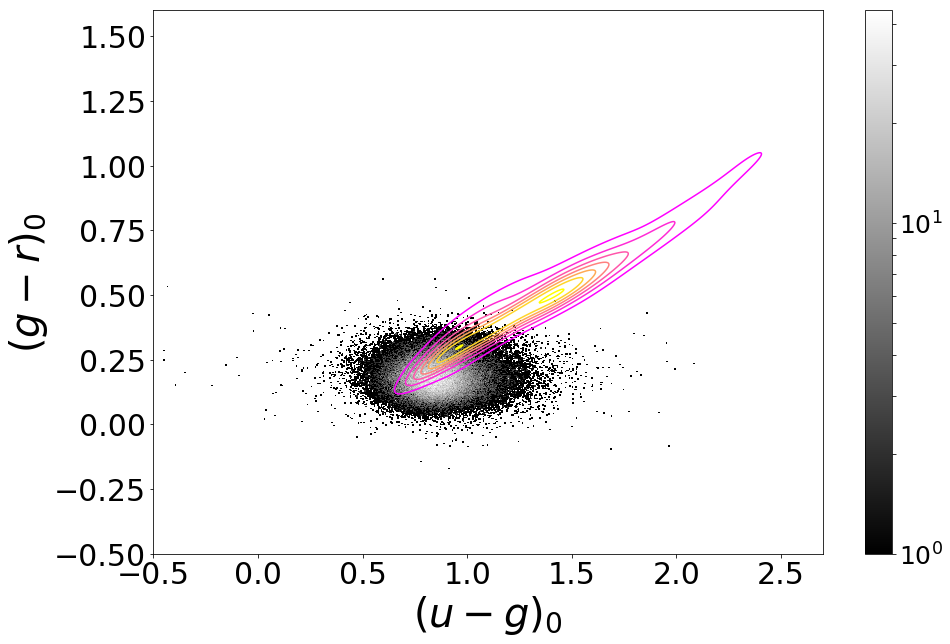

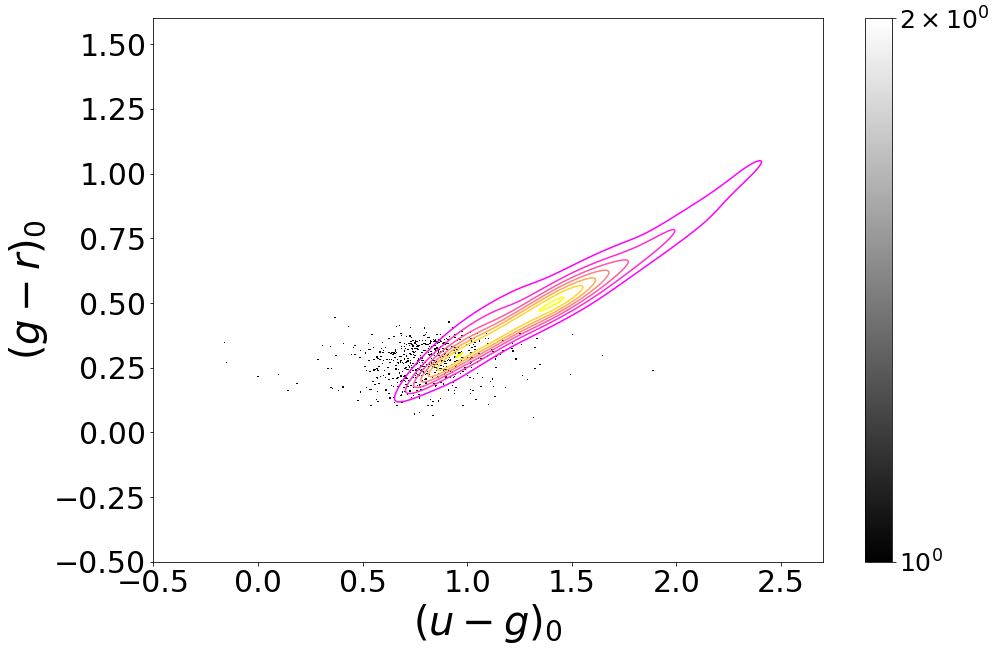

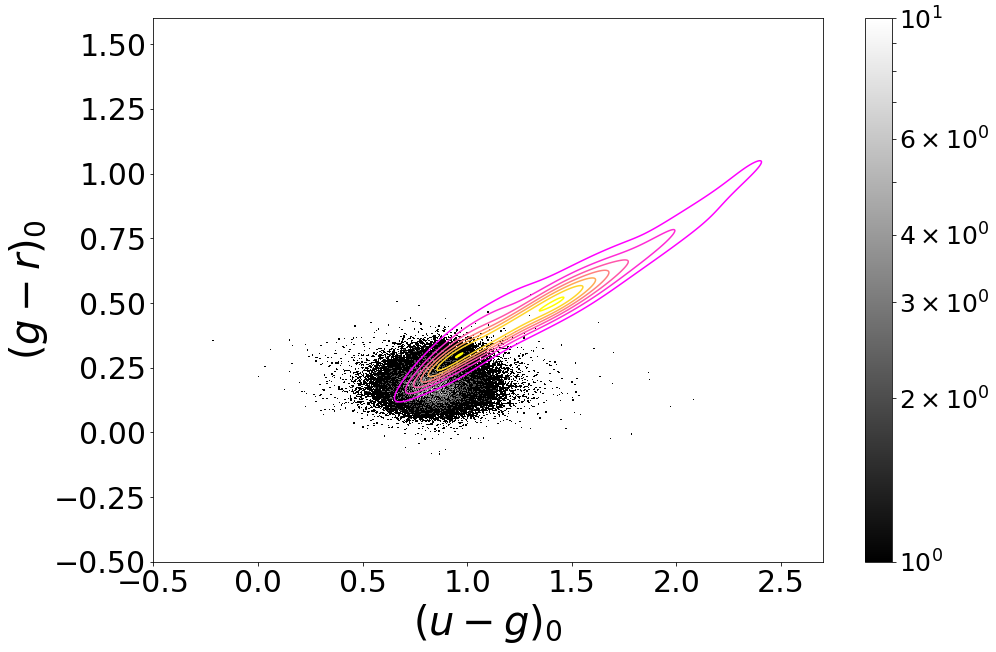

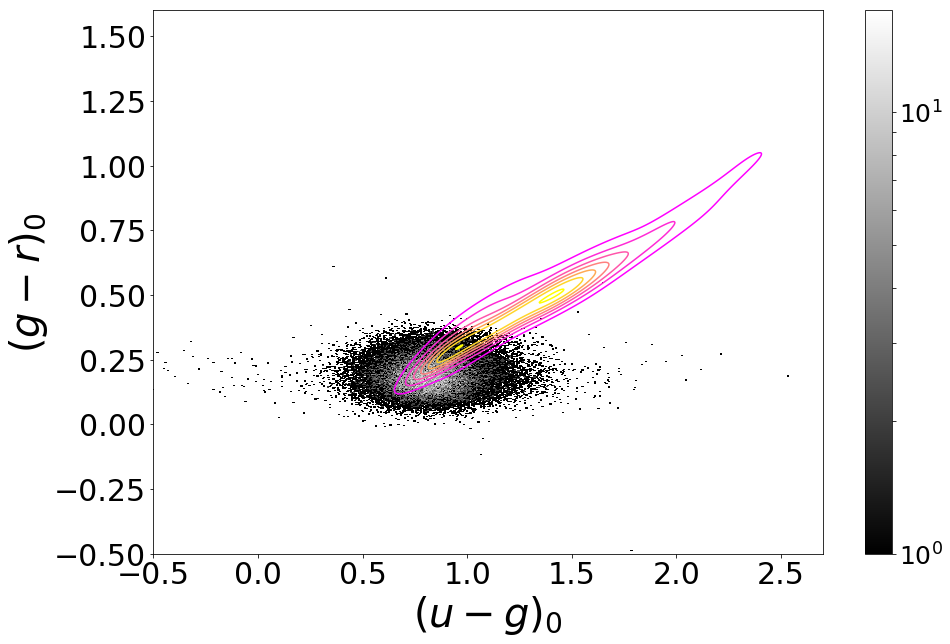

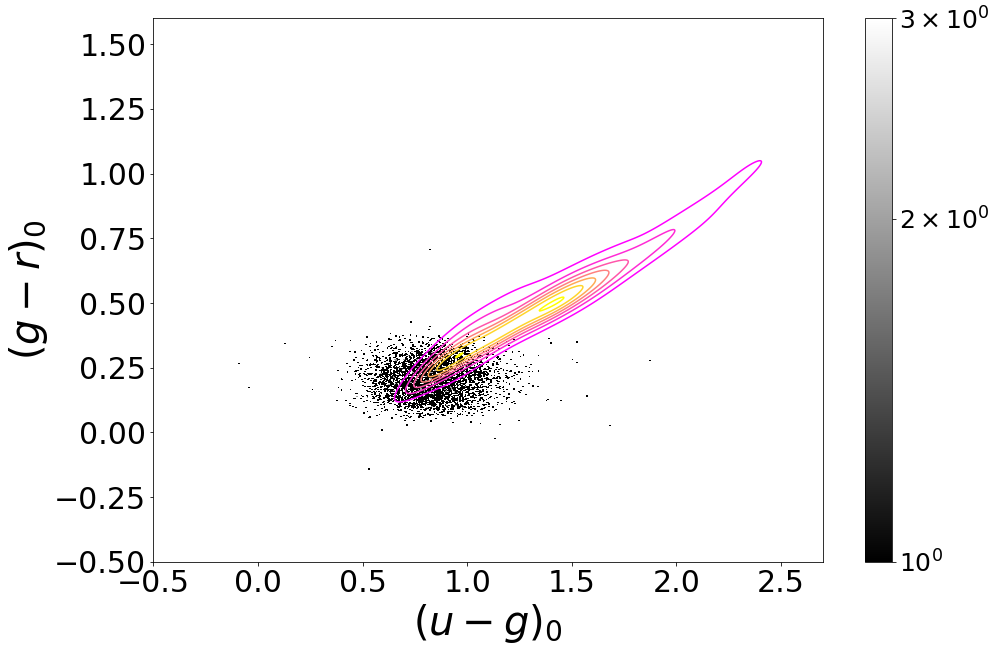

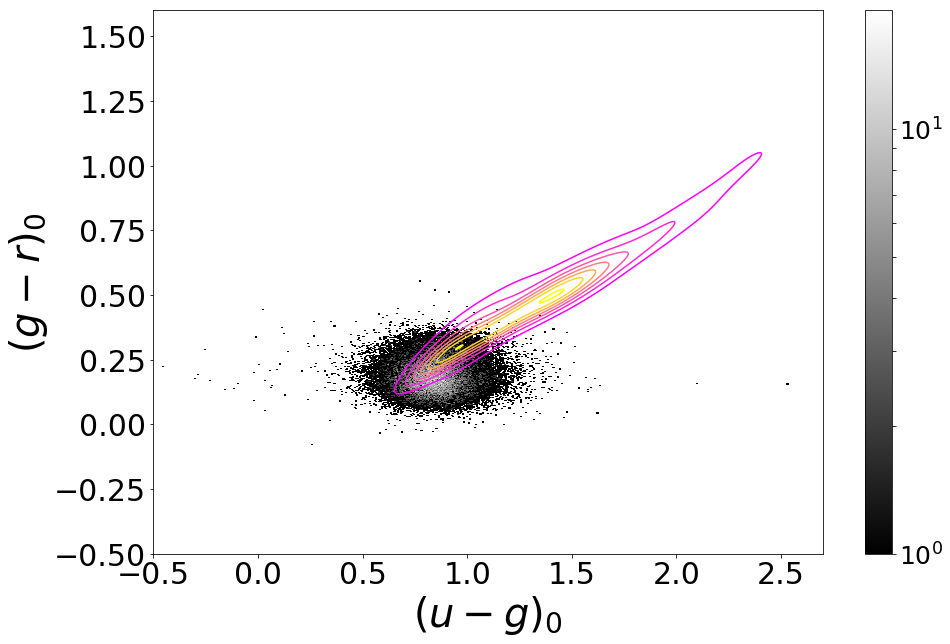

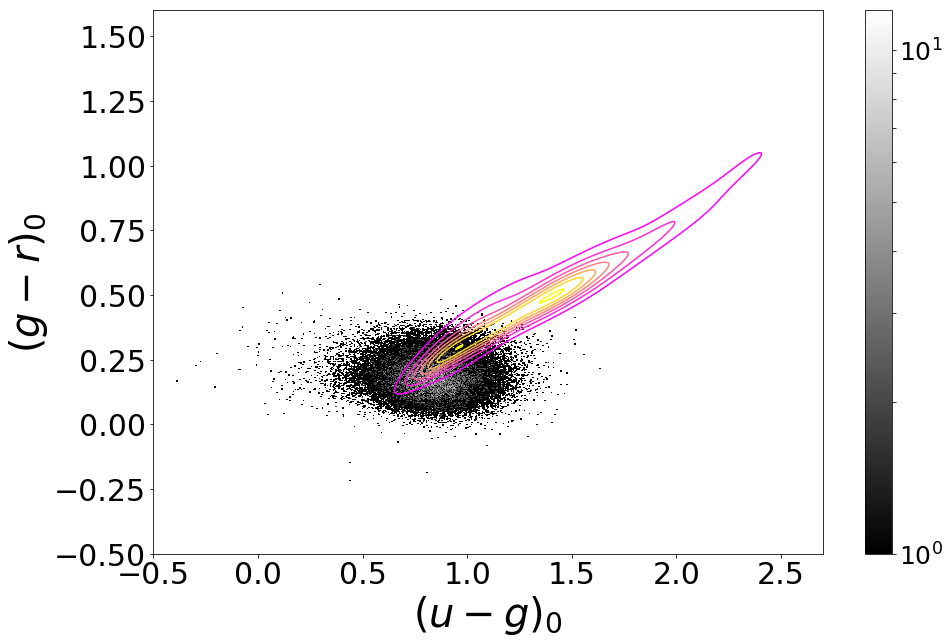

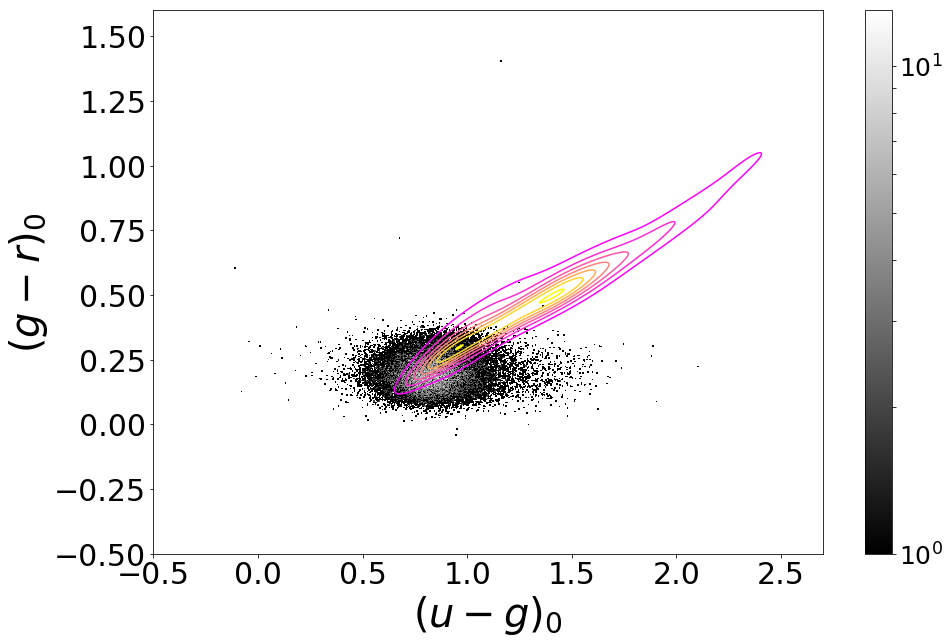

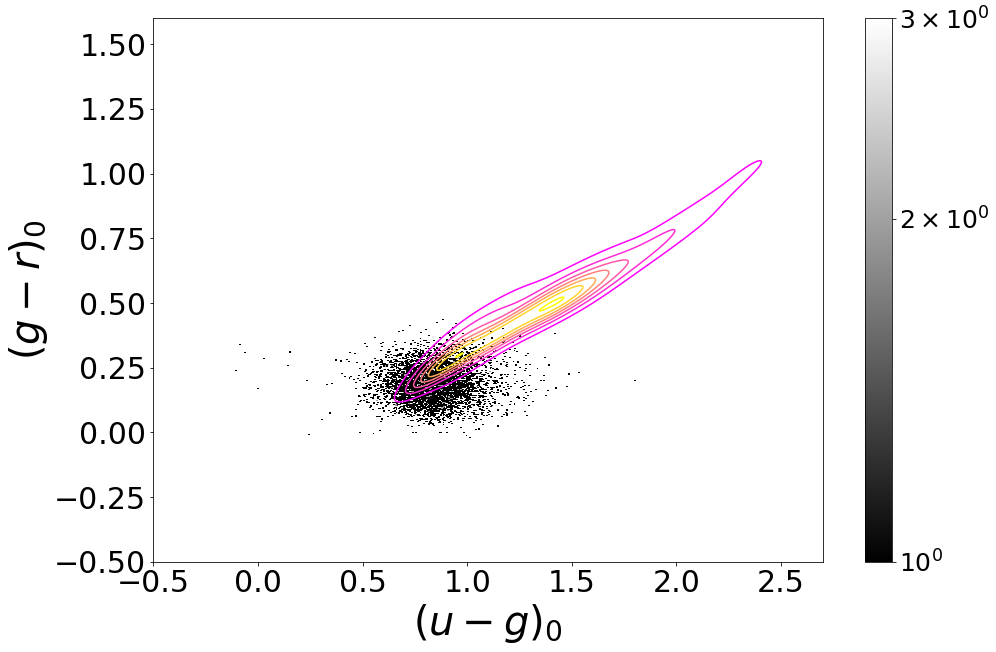

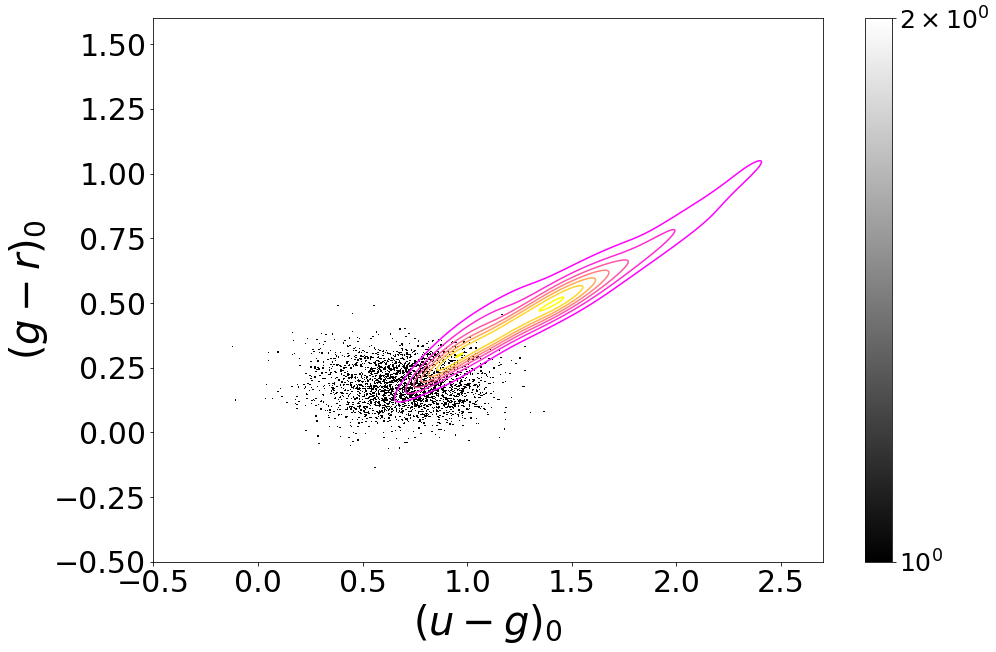

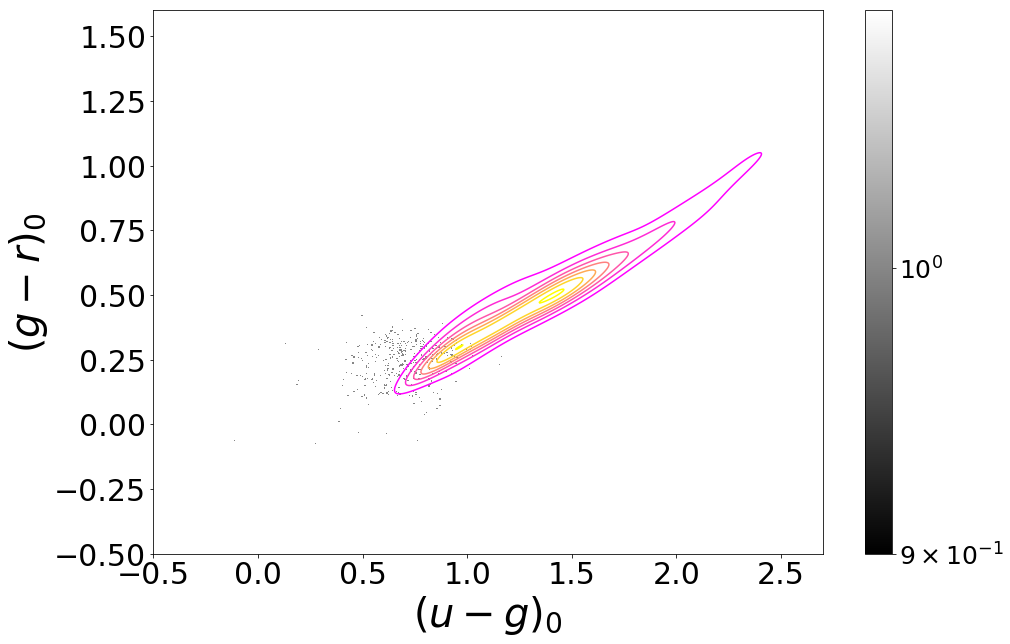

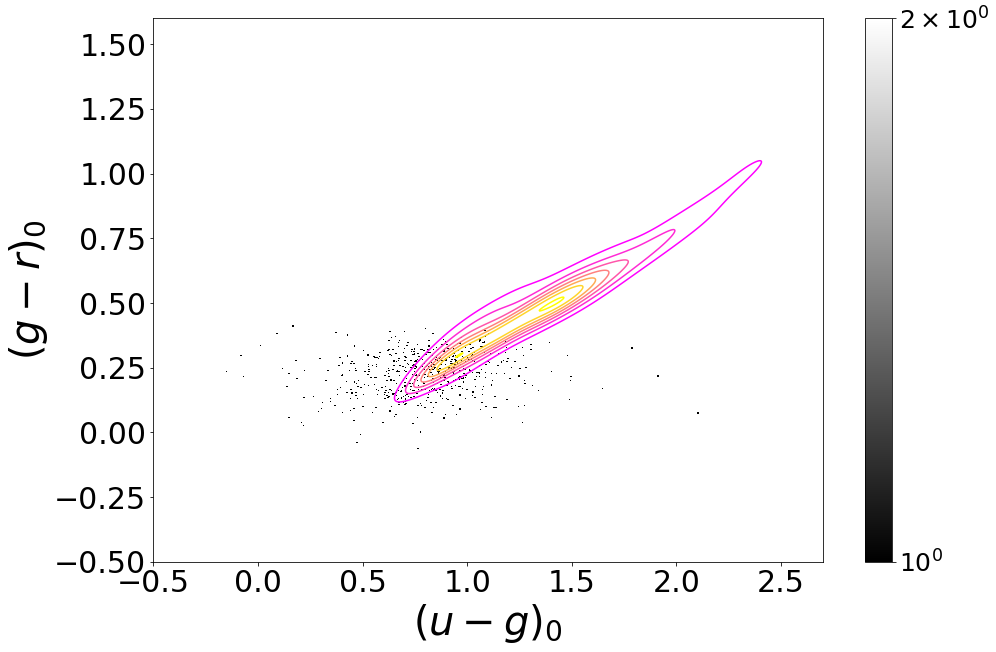

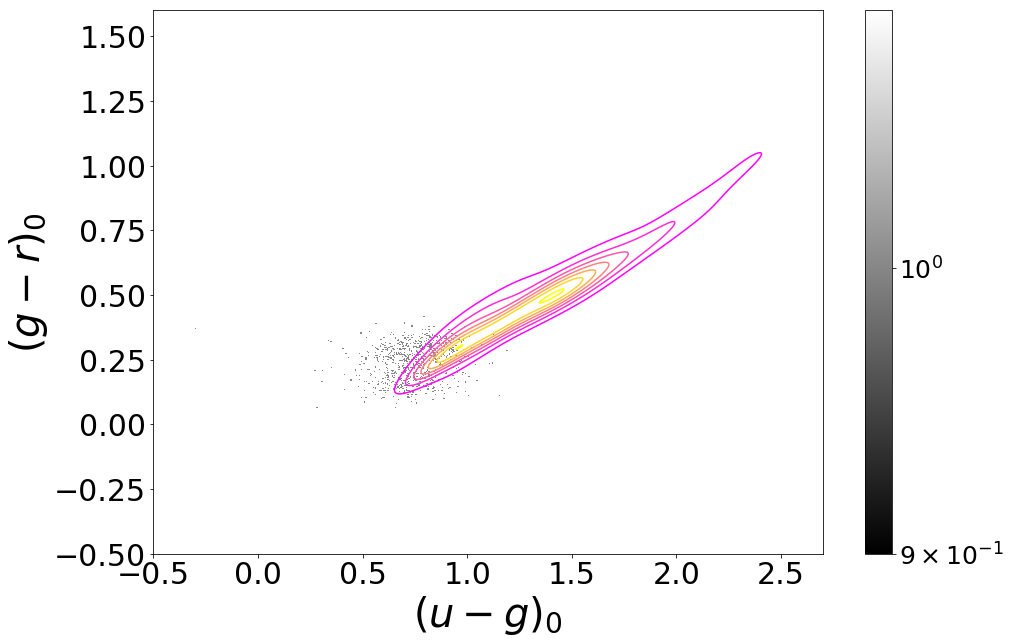

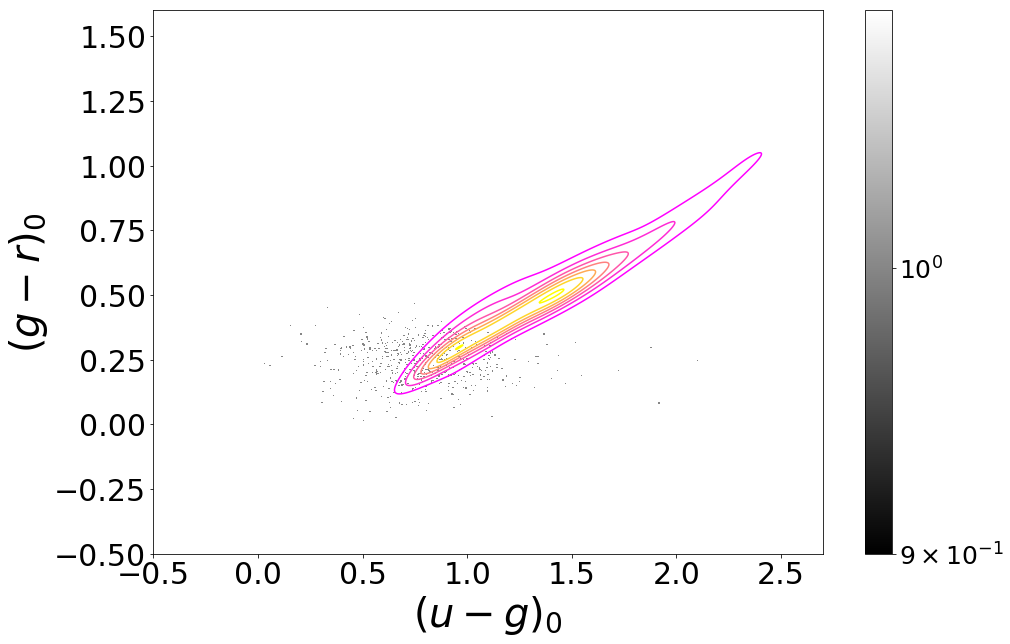

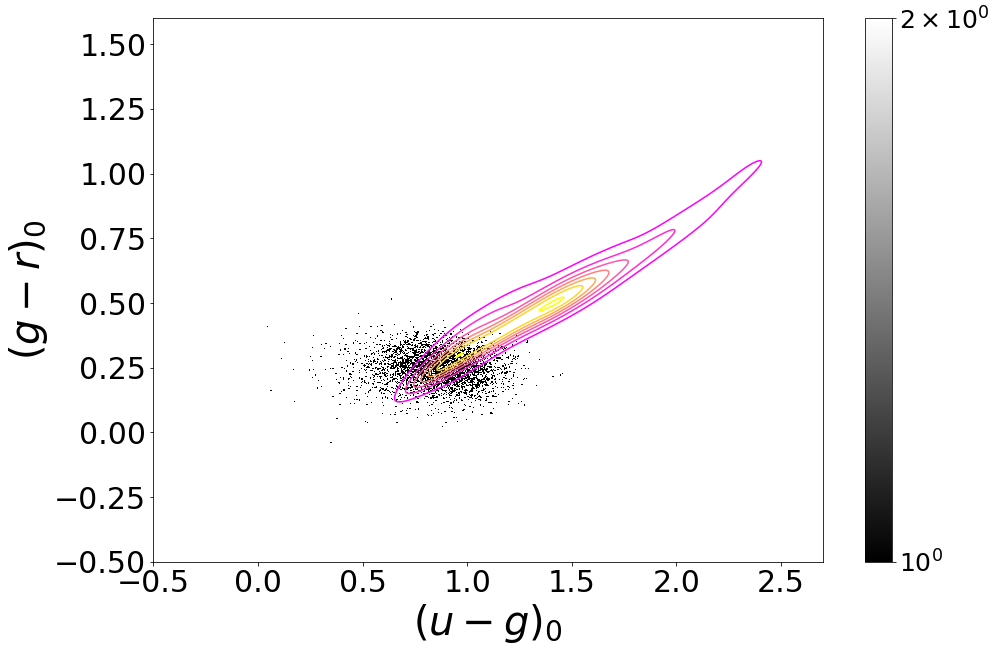

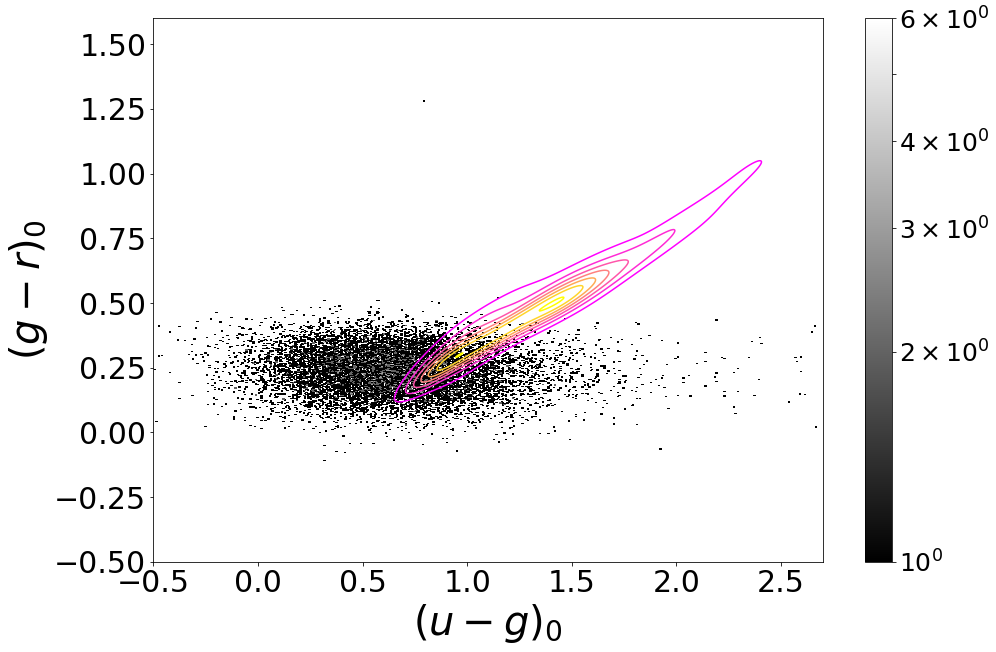

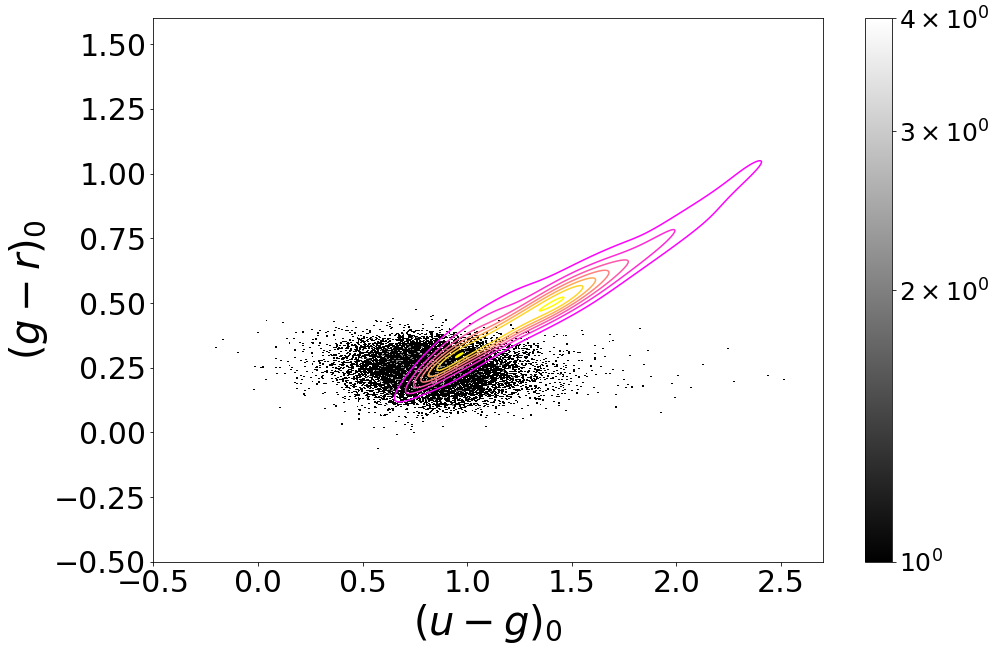

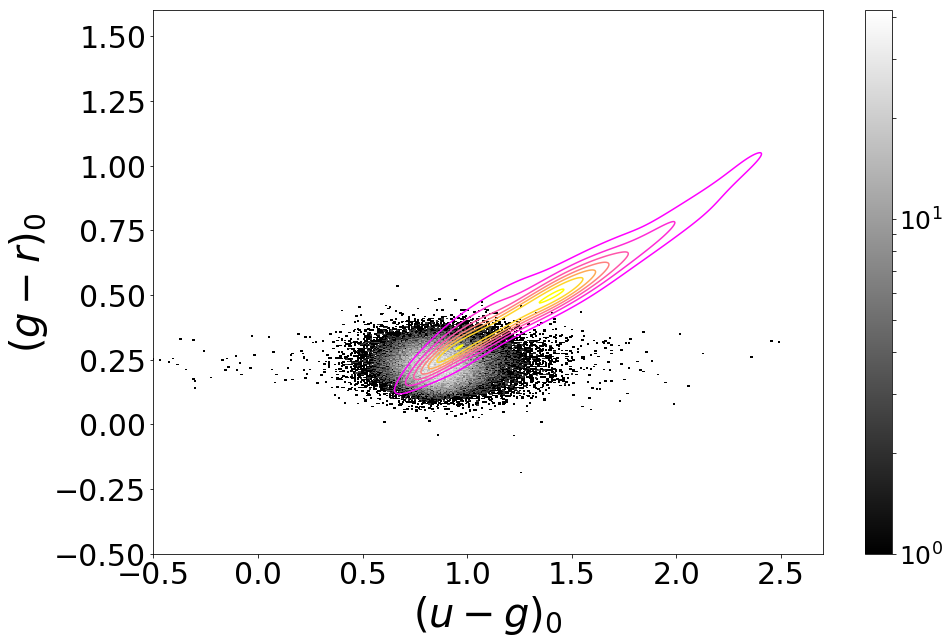

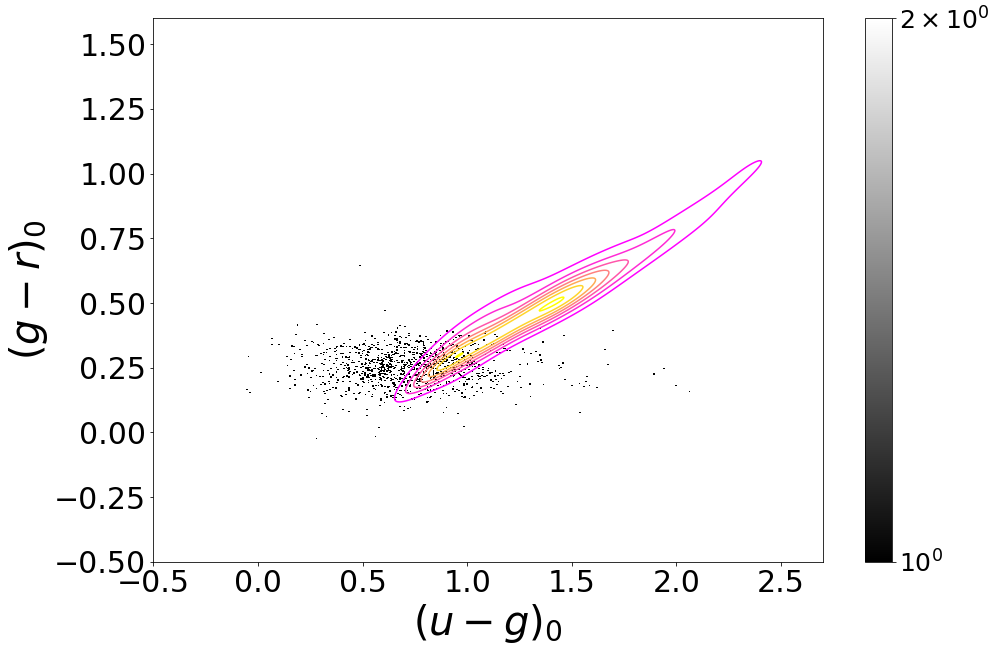

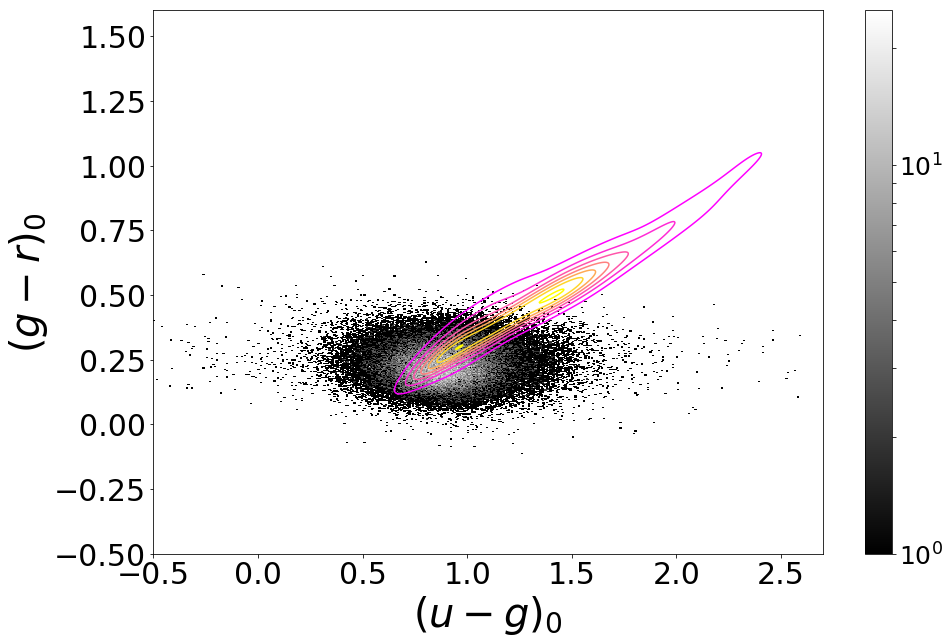

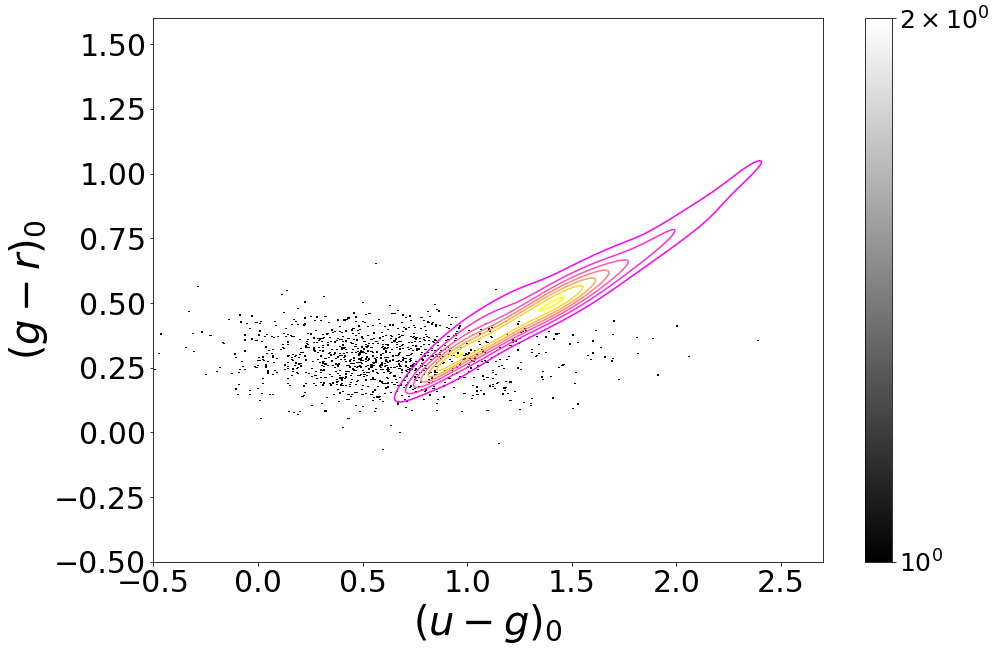

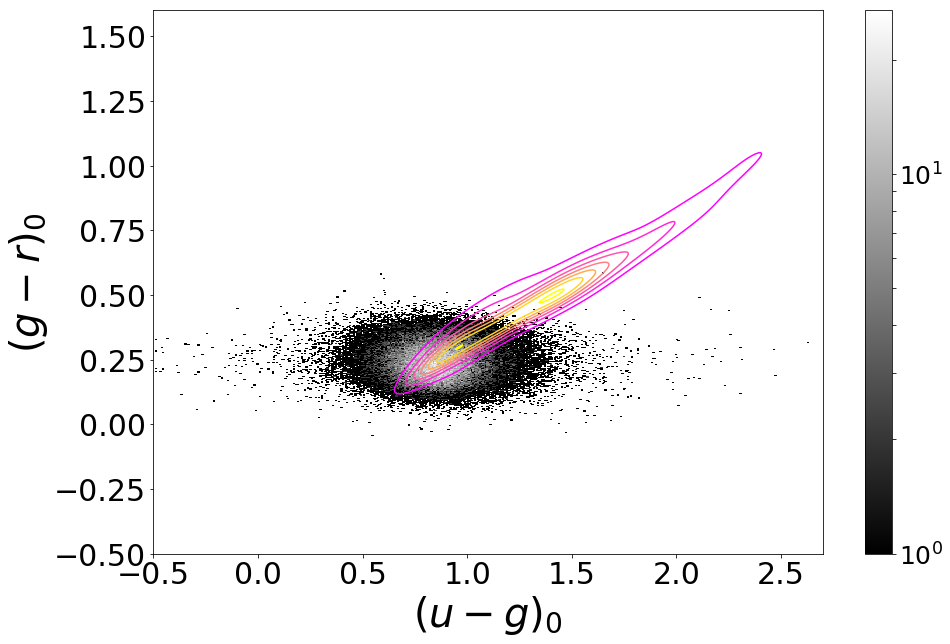

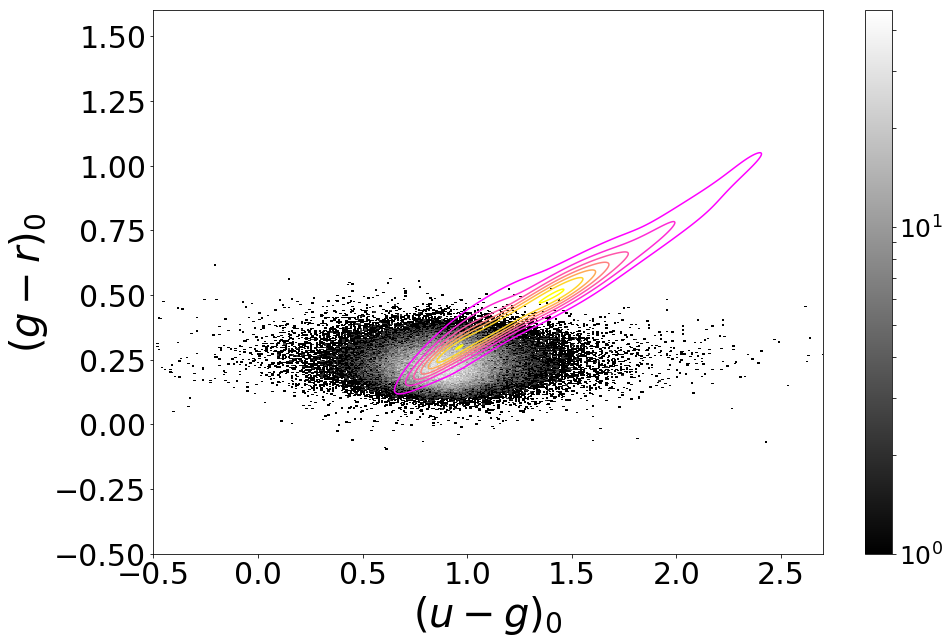

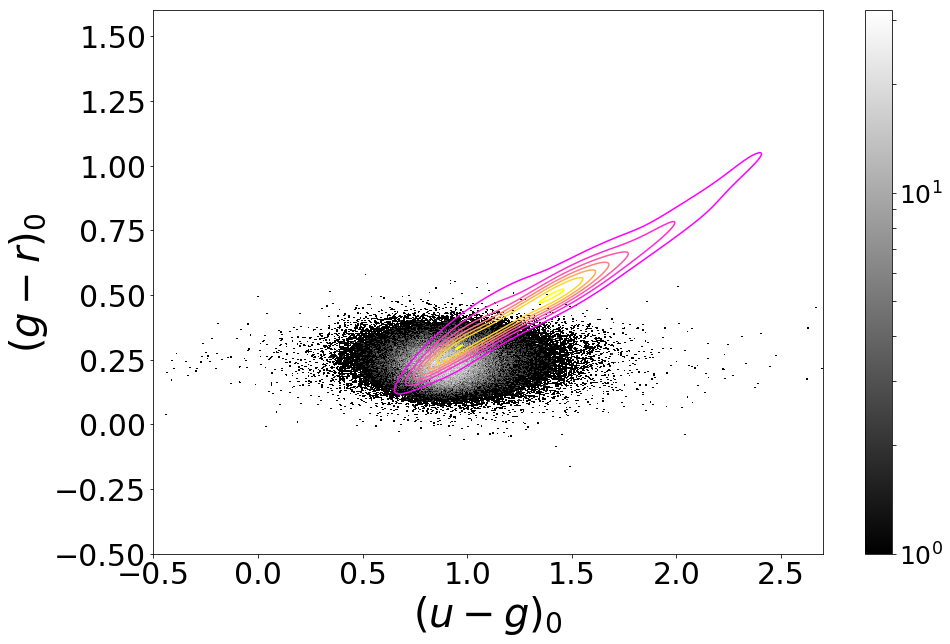

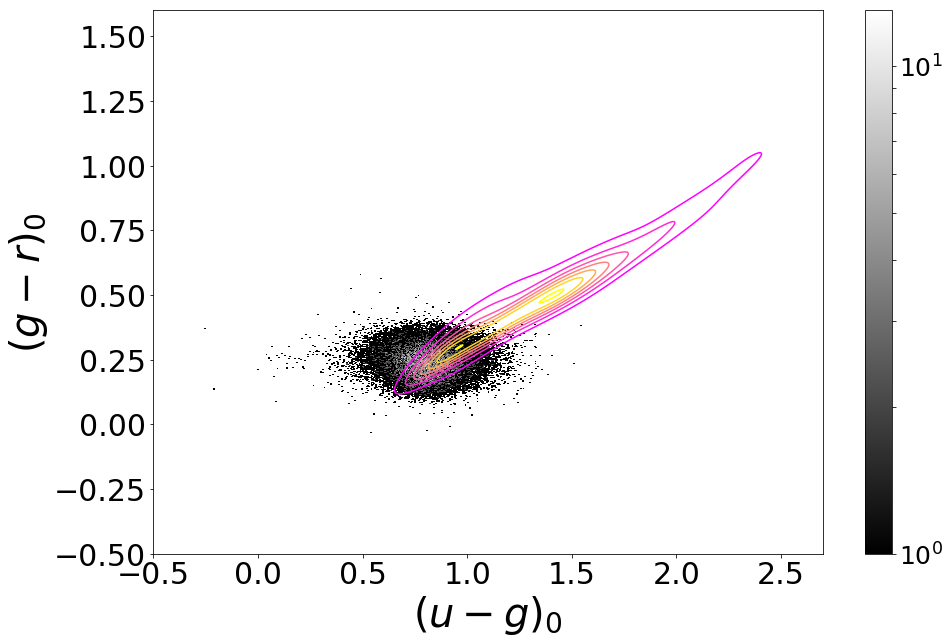

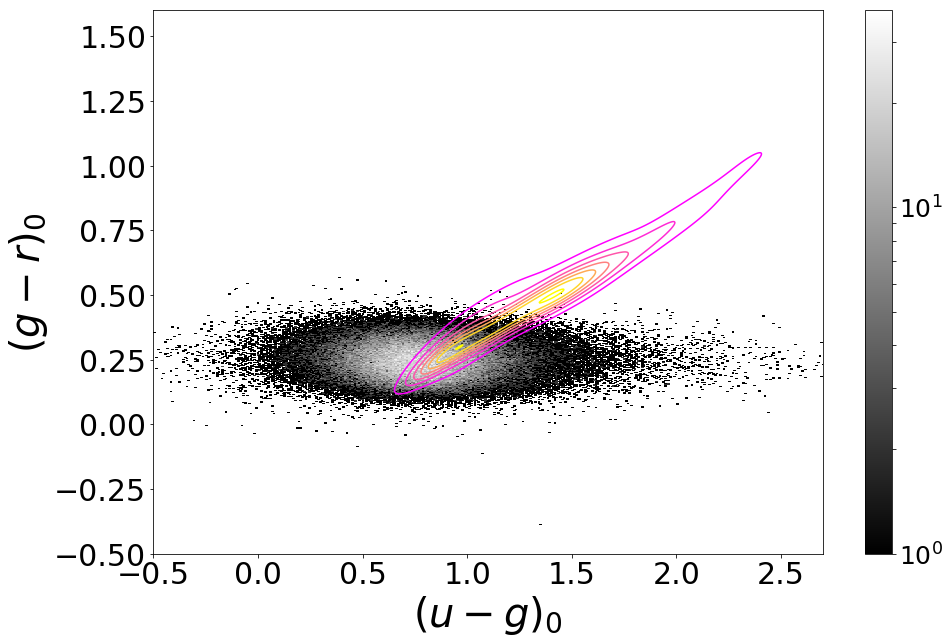

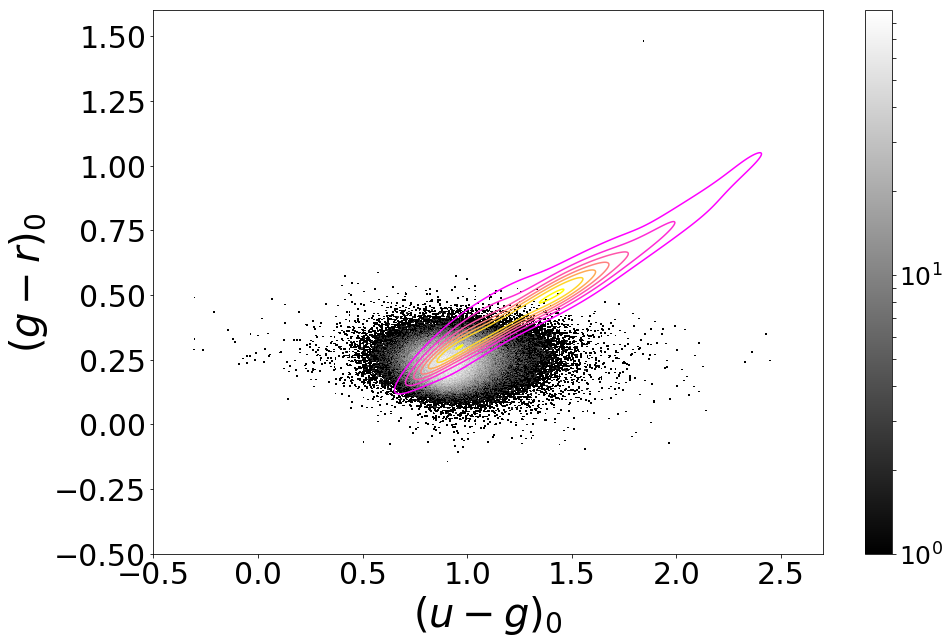

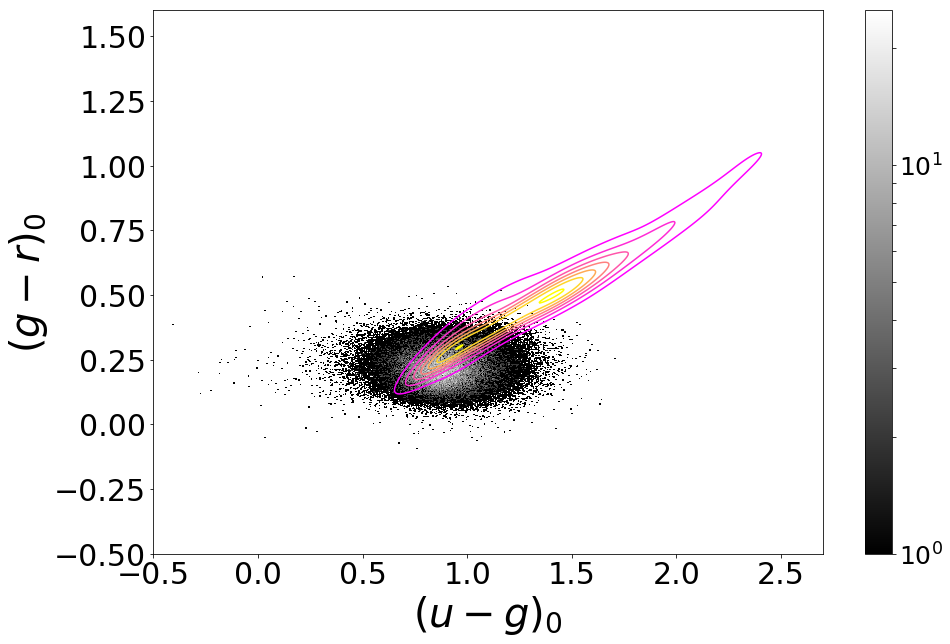

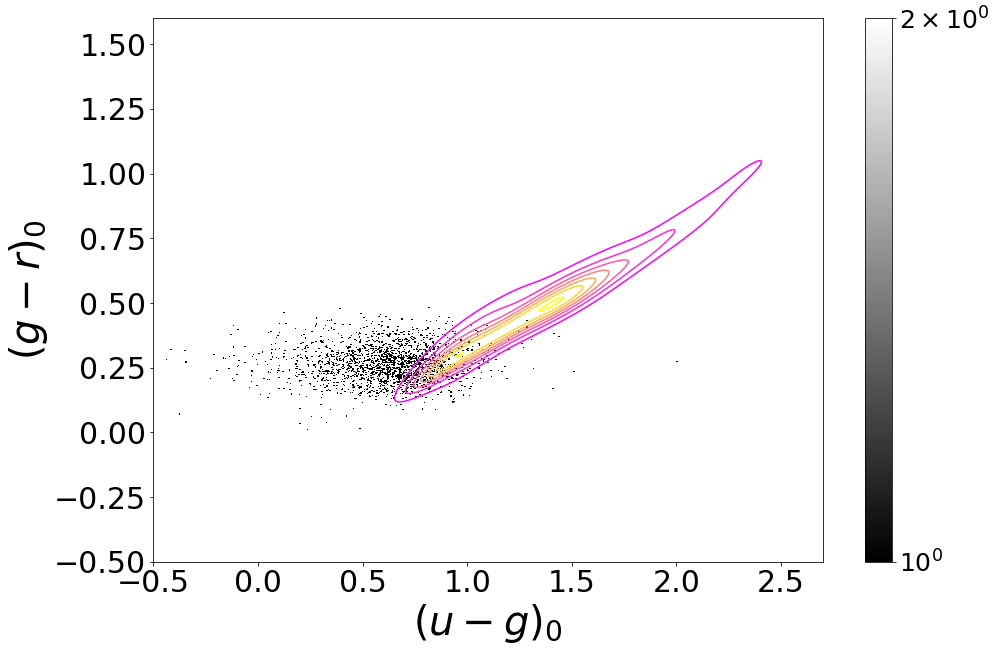

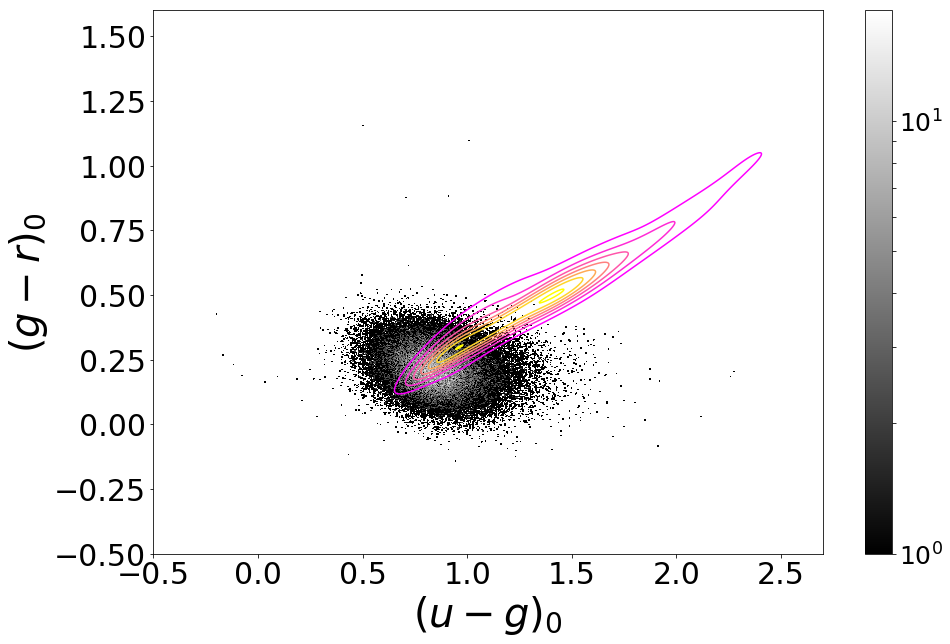

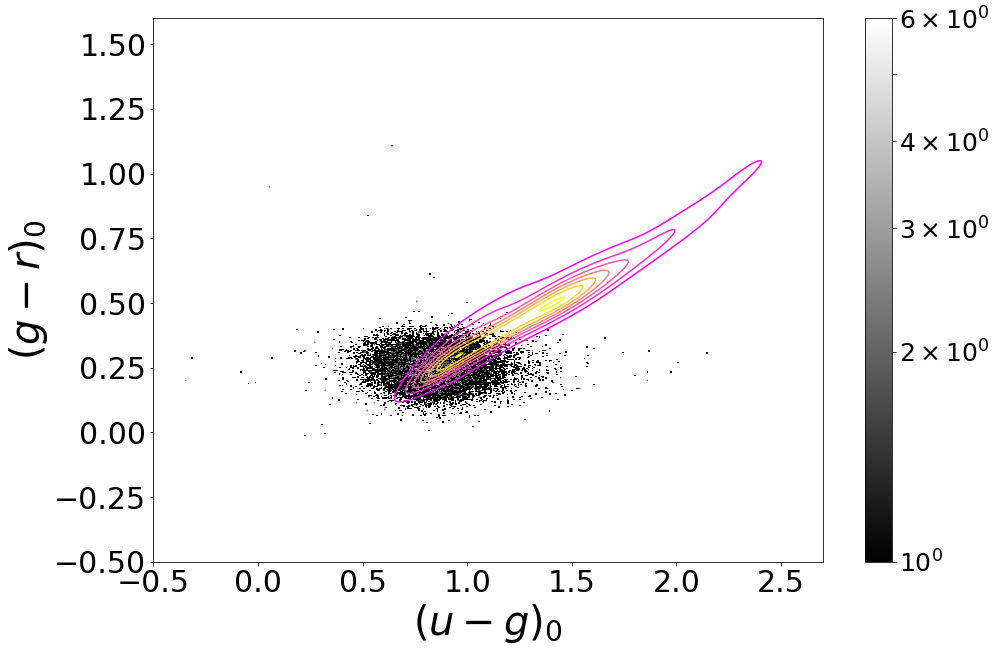

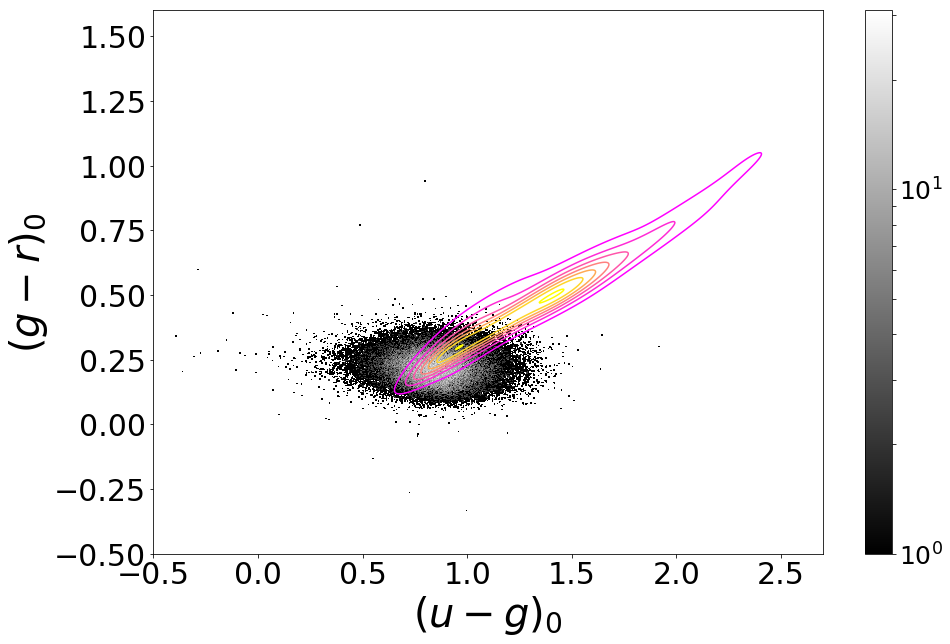

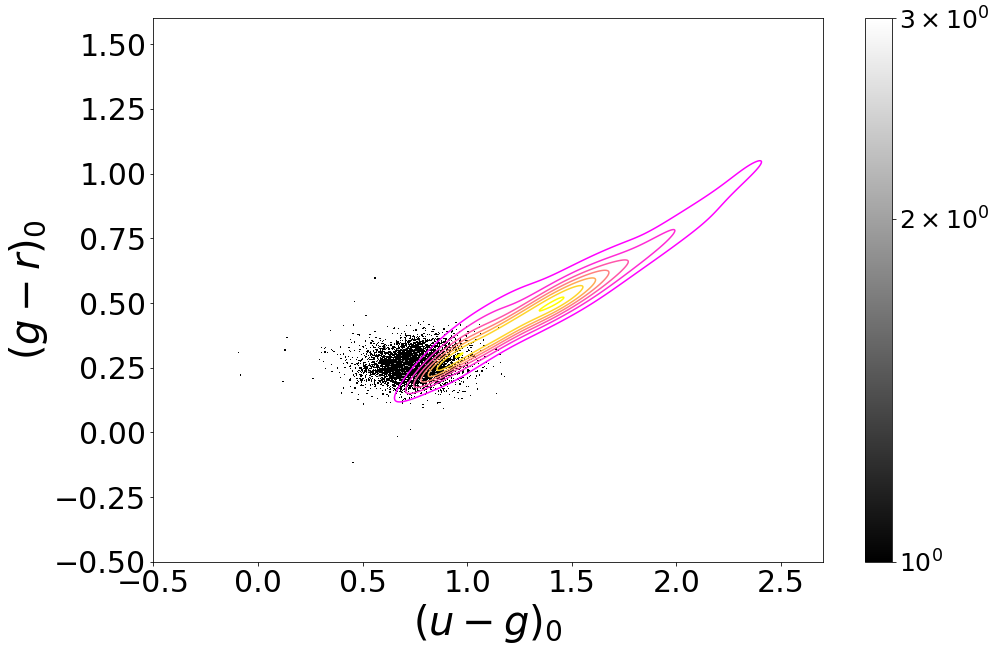

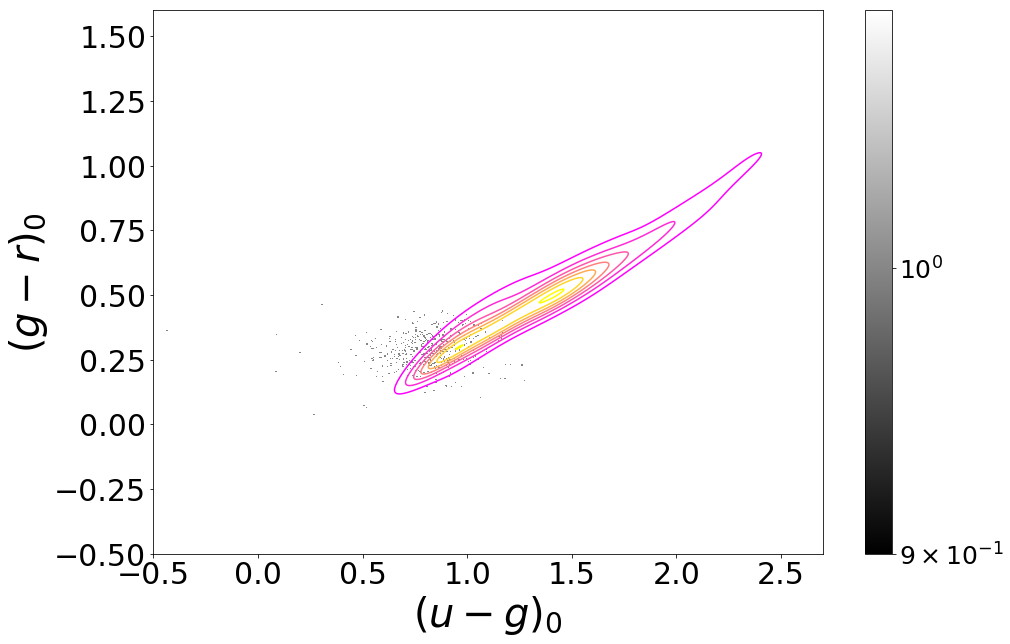

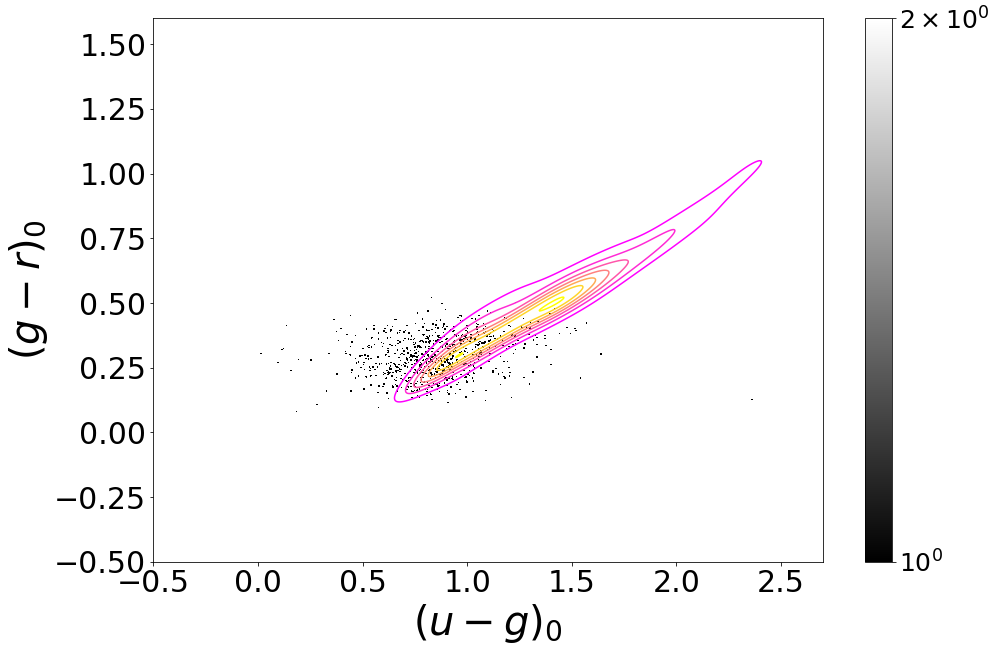

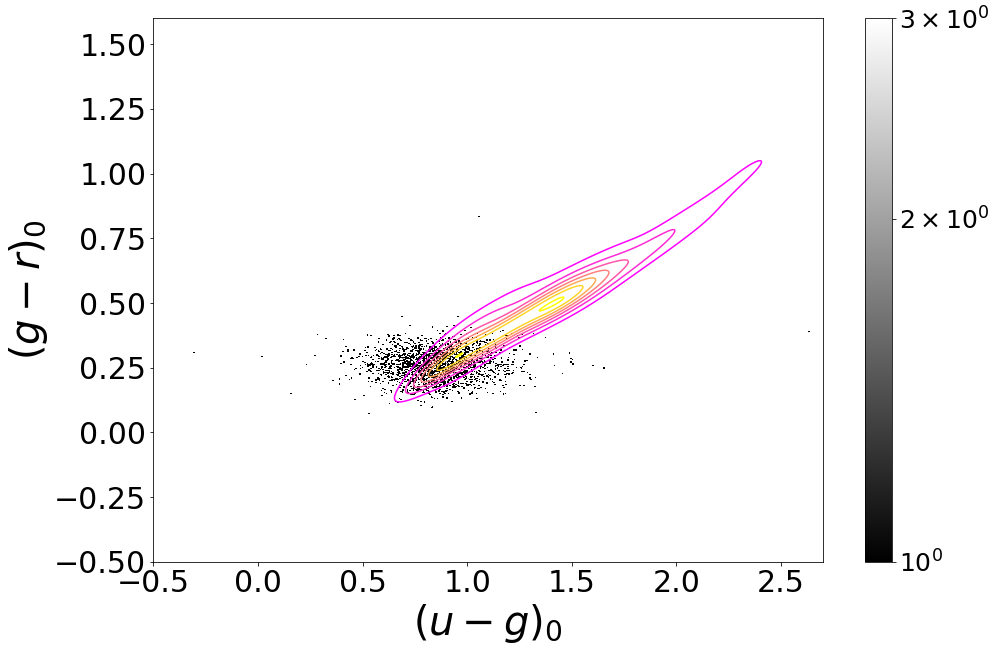

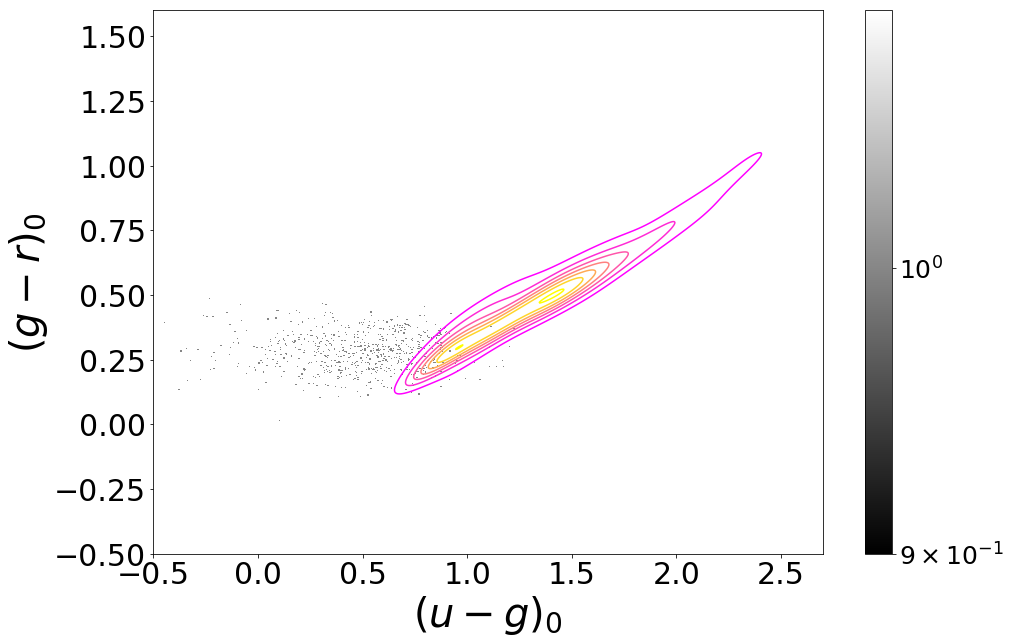

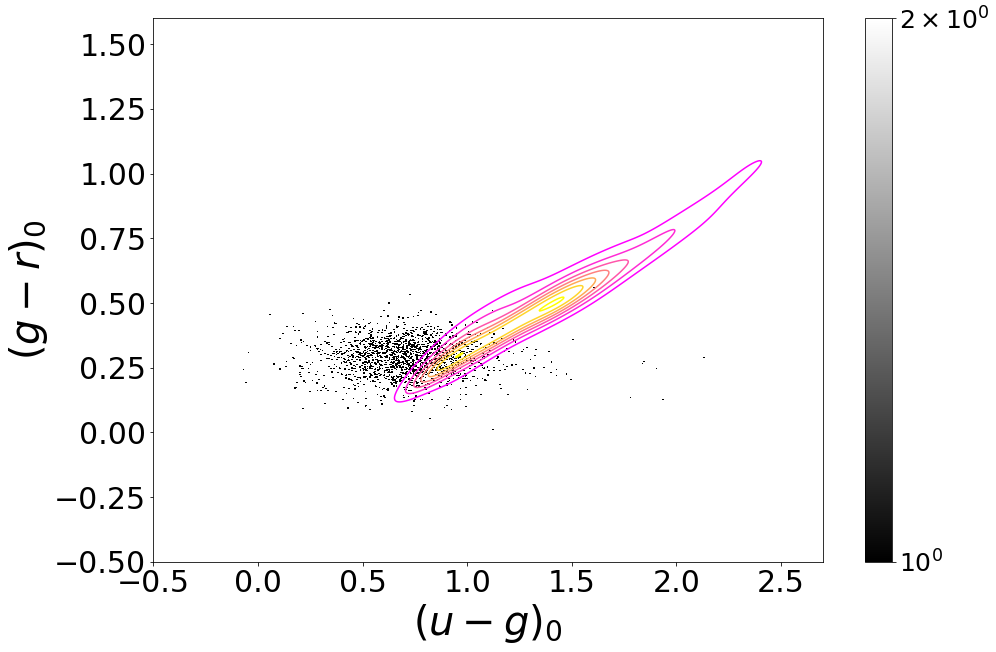

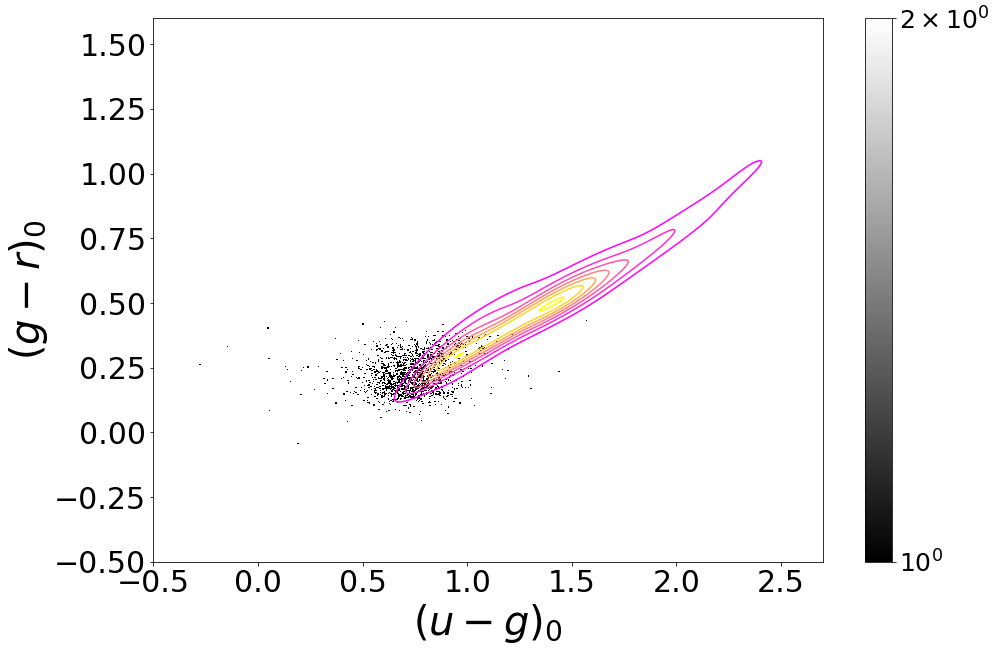

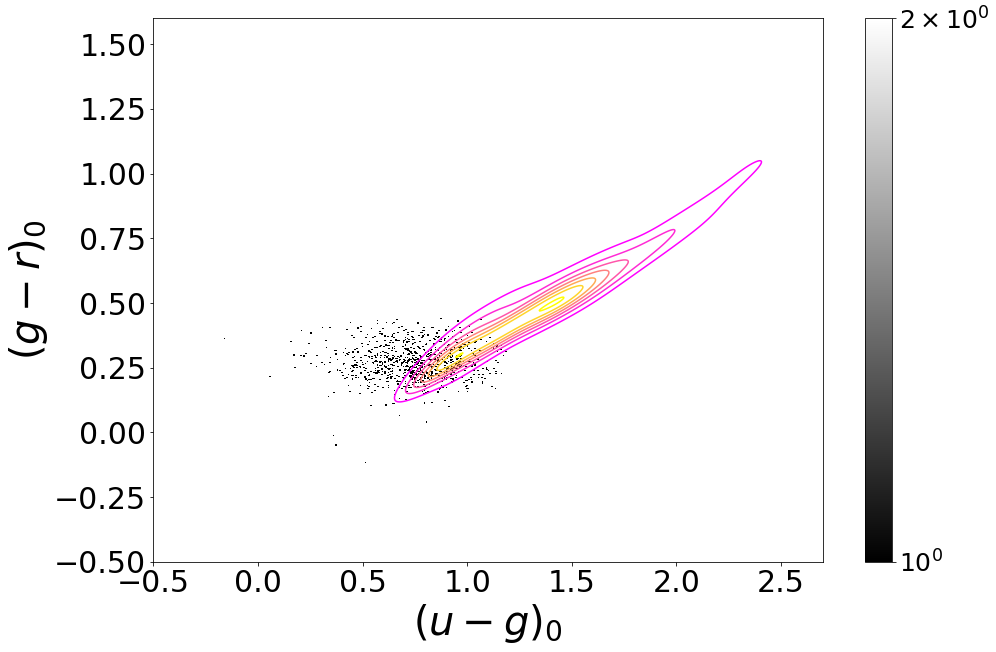

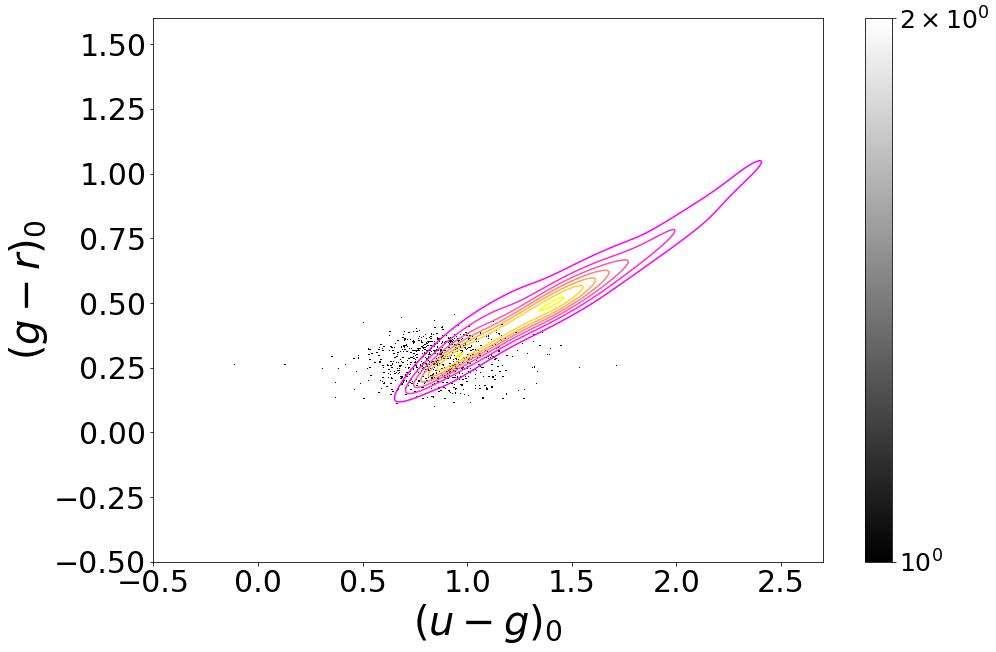

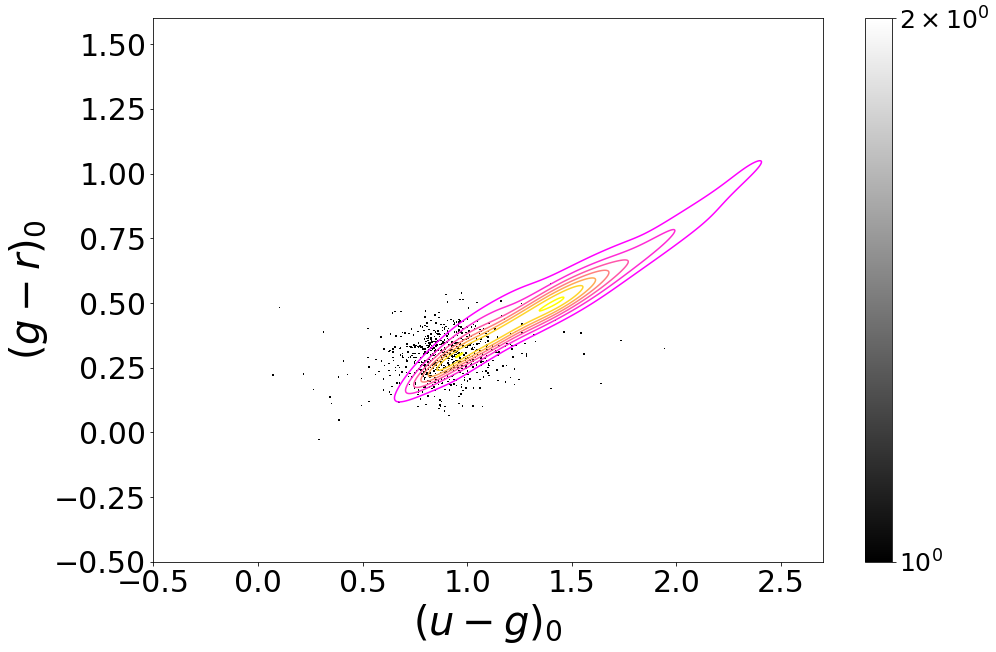

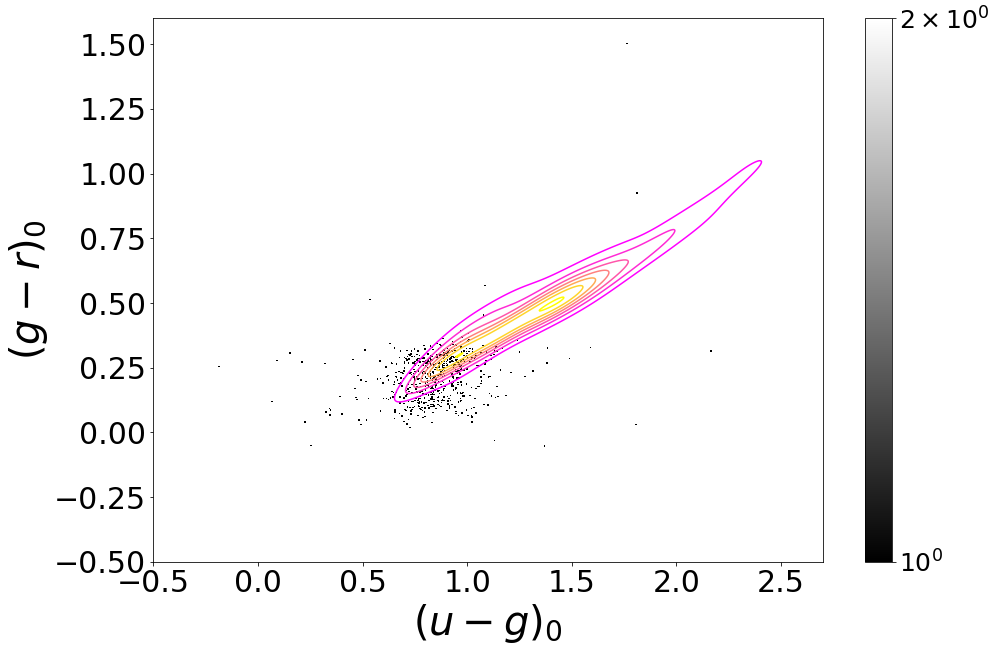

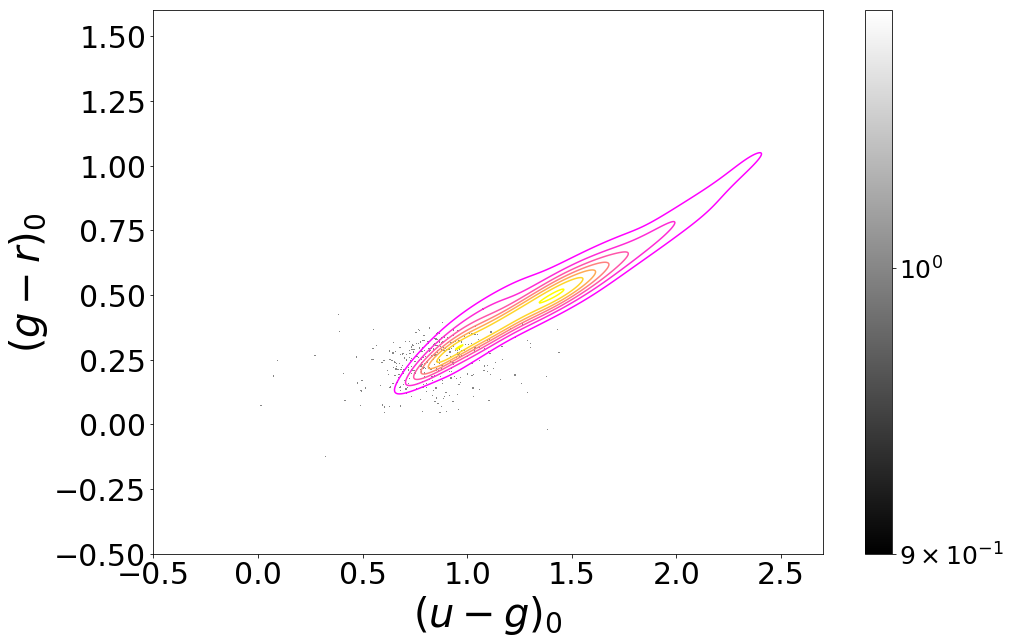

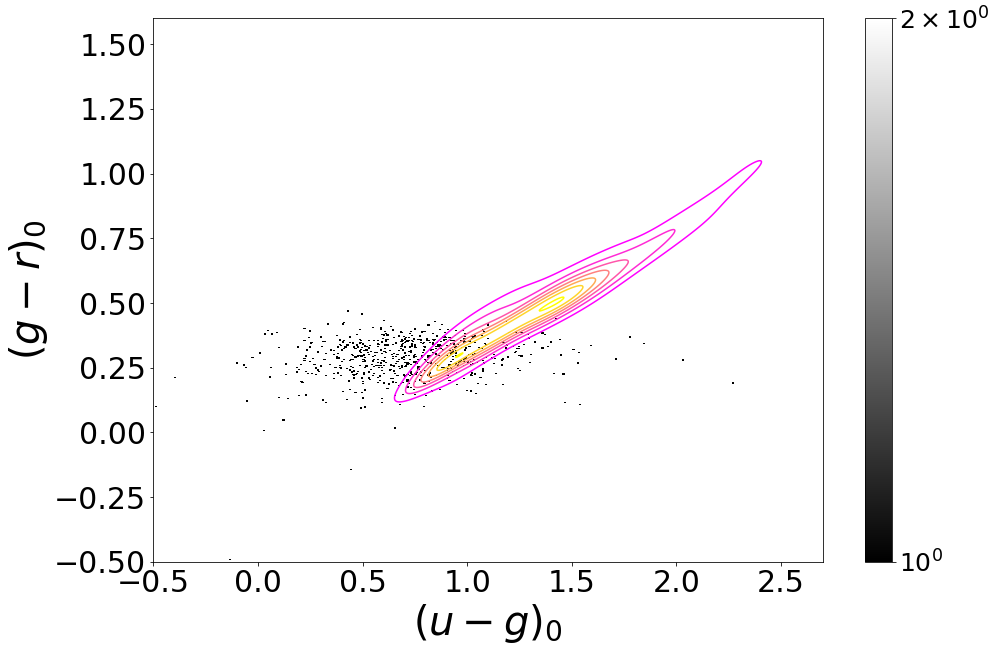

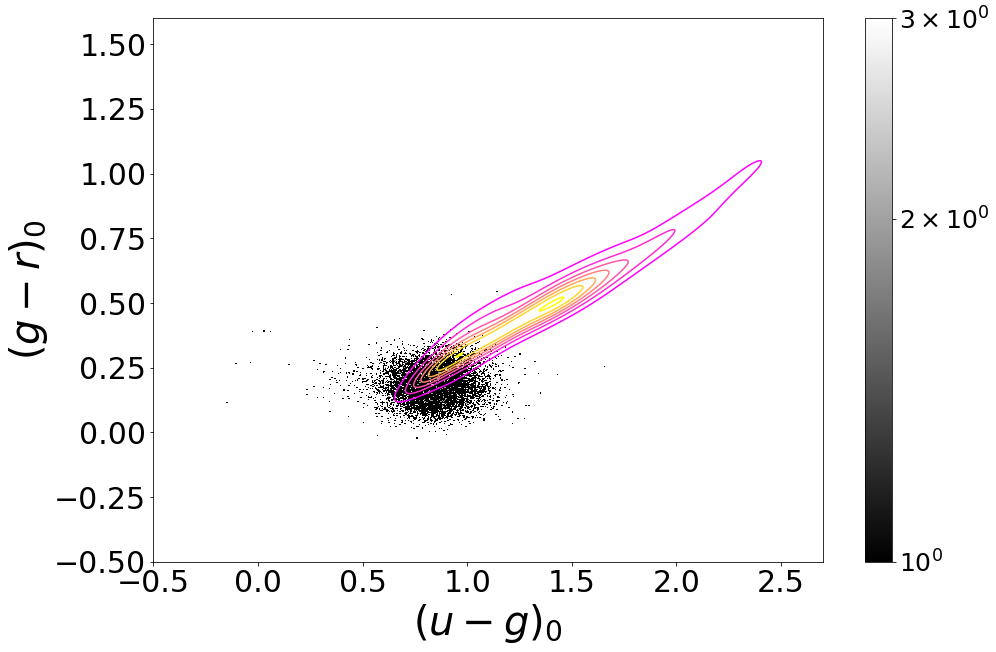

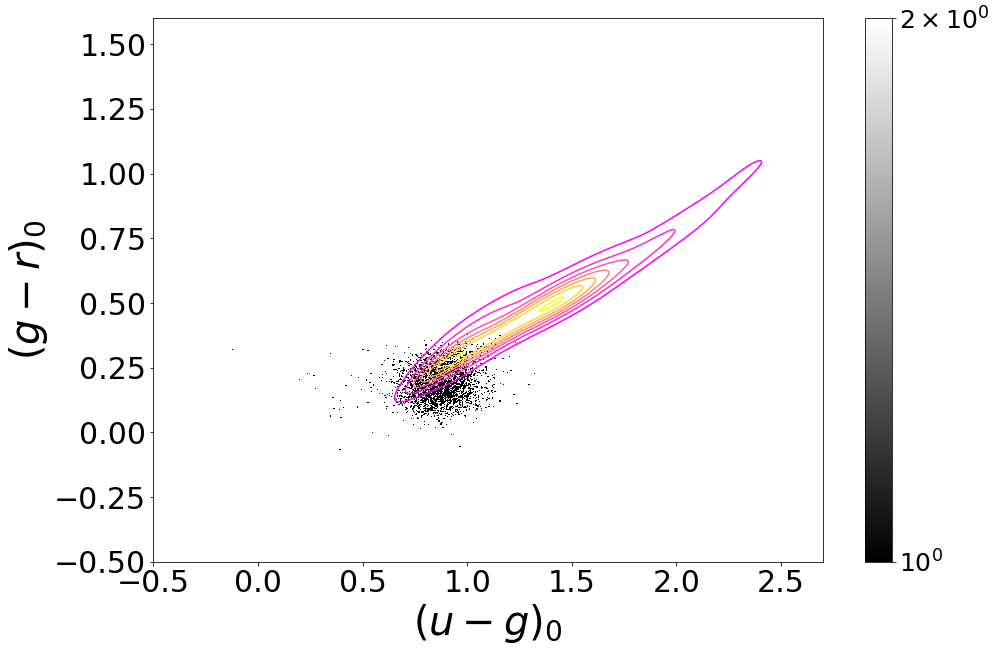

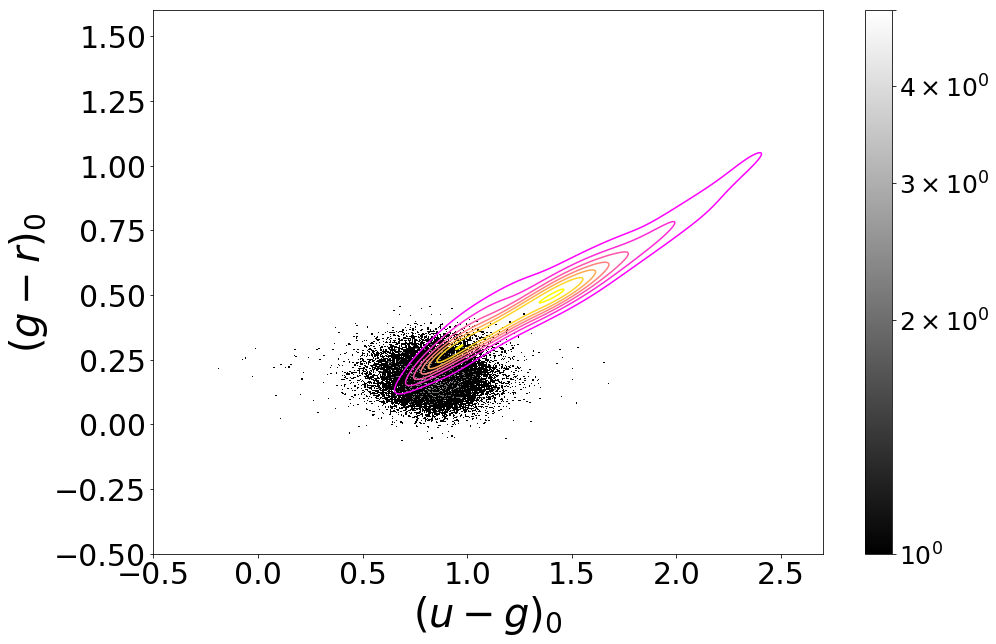

In [16]:

if __name__=="__main__":
    for number in fields:
        plot('/Users/amyel/research/SMASH_project/datafiles/SMASH_fields/vsix/starsthree/Field{}_allobj_deep_stars.fits.gz'.format(number))

              